# Gaussian Process Classificator

## Import and Settings

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from joblib import dump
import dask.dataframe as dd

In [2]:
df = dd.read_csv('prepared_ds.csv')

## Initialise Sample Dataframe

In [3]:
df_fast = df.sample(frac=0.001, random_state = 1).compute()

In [4]:
df_fast.shape

(7605, 41)

## Train-Test-Split

In [5]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[~df_fast.columns.isin(['Unnamed: 0', 'Label'])]], df_fast['Label'], test_size=0.2, random_state=1)

## Training

In [6]:
%%time
clf = GaussianProcessClassifier(kernel=2.0 * RBF(length_scale=2.0), optimizer=None, random_state=1, multi_class='one_vs_one', n_jobs=-1, copy_X_train=False)
clf.fit(train, train_lbl)

Wall time: 1min 22s


GaussianProcessClassifier(copy_X_train=False,
                          kernel=1.41**2 * RBF(length_scale=2),
                          multi_class='one_vs_one', n_jobs=-1, optimizer=None,
                          random_state=1)

## Evaluation

In [7]:
clf.score(test, test_lbl)

0.9901380670611439

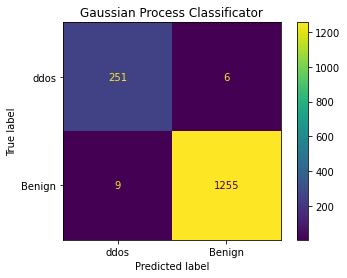

In [8]:
fig = plot_confusion_matrix(clf, test, test_lbl, labels=['ddos', 'Benign'])
fig.ax_.set_title('Gaussian Process Classificator')
fig.figure_.savefig('img/confusion_matrix_gpc.png')

The model might be good at predicting the correct values but it takes much space and time to train and store it.

## Save Model

In [9]:
dump(clf, 'models/gpc_fast.model')

['models/gpc_fast.model']